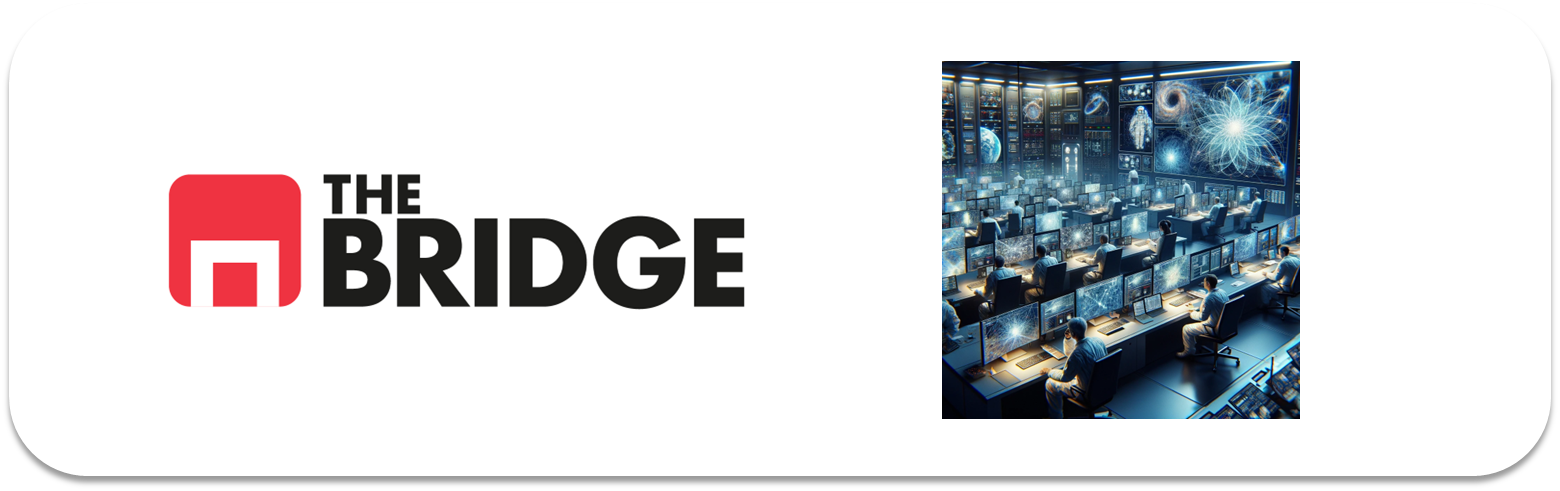

## PRACTICA OBLIGATORIA: **Transfer Learning y Fine Tuning**

* La práctica obligatoria de esta unidad consiste en un repetir el ejercicio de construcción de un modelo de clasificación de paisajes pero usando un modelo preentrenado. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import os
import numpy as np
import pandas as pd
import cv2
import zipfile
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from keras.applications import InceptionV3
from keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Objetivo del ejercicio

Comparar una red convolucional hecha ad-hoc frente a los modelos preentrenados y ajustados con fine tuning y transfer learning. Para ello emplea el dataset de paisajes del conjunto de ejercicios de la unidad anterior.


### Se pide

1. Preparar los datos del modelo y las funciones de visualización, copia para ello todo lo que necesites de las soluciones del ejercicio de clasificación de paisajes de la unidad anterior.

2. Escoger entre uno de los modelos VGG-19, InceptionV3 y MobileNetV2 (todos en https://keras.io/api/applications/) (Se aconseja este último si no tenemos un ordenador muy potente). Si no te haces con estos puedes recurrir a la ResNetV50.

4. Hacer un transfer-learning con una cabeza de como mucho 2 capas densas ocultas y una de salida. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

5. Hacer un fine-tuning con la misma cabeza diseñada en el punto anterior. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

6. Comparar los resultados con los obtenidos con la red convolucional del ejercicio mencionado.

EXTRA:
- Repetir el transfer learning empleando aumentado de imágenes.



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 212s 1us/step


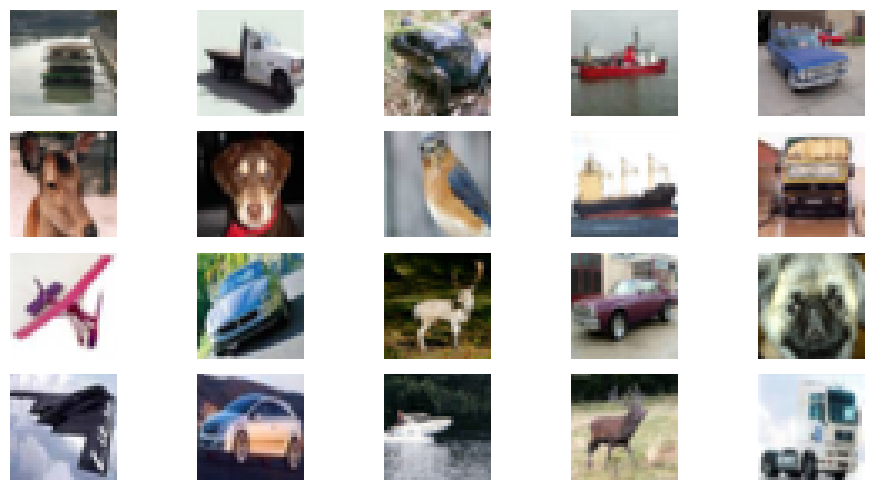

C:\Users\mario\AppData\Local\Temp\ipykernel_10280\3786674890.py:31: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.2697 - loss: 2.0143 - val_accuracy: 0.3283 - val_loss: 1.8555
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.3328 - loss: 1.8335 - val_accuracy: 0.3406 - val_loss: 1.8130
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.3529 - loss: 1.7860 - val_accuracy: 0.3490 - val_loss: 1.8001
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.3609 - loss: 1.7606 - val_accuracy: 0.3543 - val_loss: 1.7890
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.3715 - loss: 1.7353 - val_accuracy: 0.3634 - val_loss: 1.7825
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.3768 - loss: 1.7265 - val_accuracy: 0.3591 - val_loss: 1.7801
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.3801 - loss: 1.7089 - val_accuracy: 0.3584 - val_loss: 1.7808
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.3874 - loss: 1.6952 - 

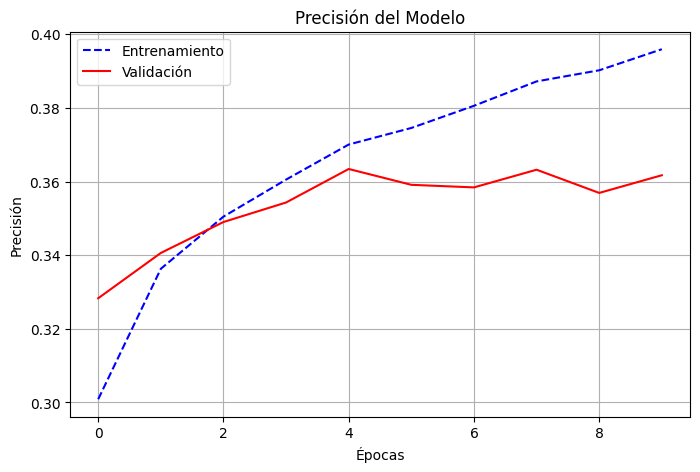

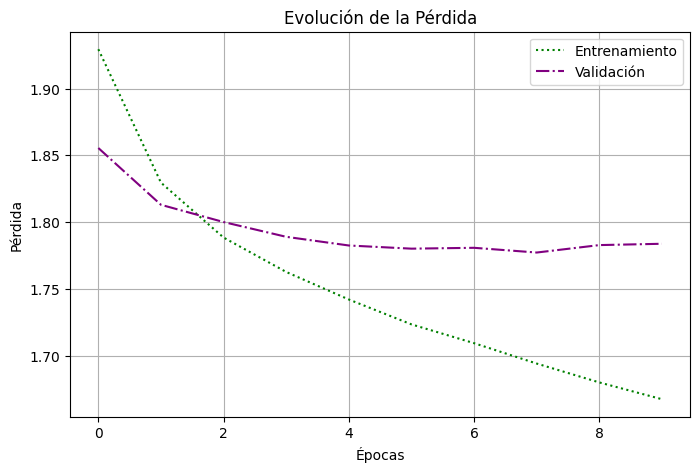

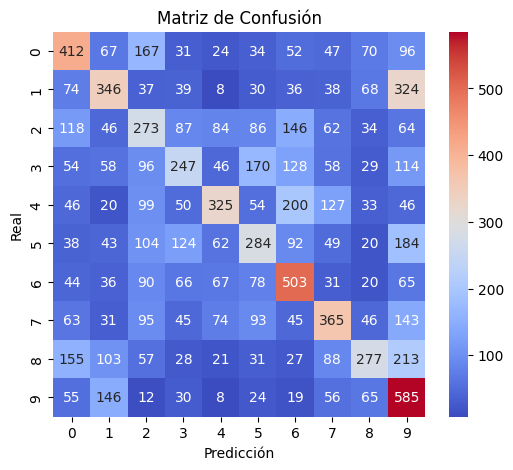

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 114ms/step - accuracy: 0.1869 - loss: 29.4380 - val_accuracy: 0.1668 - val_loss: 2.7318
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.2993 - loss: 12.4158 - val_accuracy: 0.1542 - val_loss: 3.4222
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.3218 - loss: 8.5322 - val_accuracy: 0.2090 - val_loss: 3.7538
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.3459 - loss: 6.2095 - val_accuracy: 0.2628 - val_loss: 3.6501
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.3478 - loss: 4.6744 - val_accuracy: 0.3177 - val_loss: 3.4005
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.3524 - loss: 3.6320 - val_accuracy: 0.3622 - val_loss: 3.0077
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 94ms/step - accuracy: 0.3578 - loss: 2.8693 - val_accuracy: 0.3853 - val_loss: 2.6233
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 94ms/step - accuracy: 0.3707 - loss: 2.372

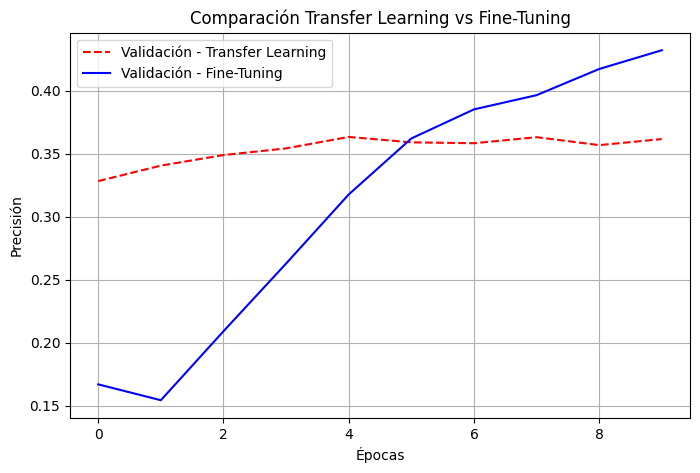

In [6]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Cargar dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train / 255.0  # Normalización
X_test = X_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Visualizar algunas imágenes
plt.figure(figsize=(10, 5))
indices = np.random.randint(0, len(X_train), 20)
for i, idx in enumerate(indices):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.axis("off")
plt.tight_layout()
plt.show()

# Modelo de Transfer Learning con MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(10, activation='softmax')(x)
model = Model(base_model.input, x)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Evaluar el modelo
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred))

# Graficar precisión
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Entrenamiento', color='blue', linestyle='dashed')
plt.plot(history.history['val_accuracy'], label='Validación', color='red', linestyle='solid')
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.title("Precisión del Modelo")
plt.legend()
plt.grid(True)
plt.show()

# Graficar pérdida
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Entrenamiento', color='green', linestyle='dotted')
plt.plot(history.history['val_loss'], label='Validación', color='purple', linestyle='dashdot')
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Evolución de la Pérdida")
plt.legend()
plt.grid(True)
plt.show()

# Matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title("Matriz de Confusión")
plt.show()

# Fine-tuning: desbloquear capas superiores
for layer in base_model.layers[-20:]:  # Desbloqueamos las últimas 20 capas
    layer.trainable = True

model.compile(optimizer=keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Reentrenar el modelo con Fine-Tuning
history_finetune = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Comparación de precisión antes y después del Fine-Tuning
plt.figure(figsize=(8, 5))
plt.plot(history.history['val_accuracy'], label='Validación - Transfer Learning', color='red', linestyle='dashed')
plt.plot(history_finetune.history['val_accuracy'], label='Validación - Fine-Tuning', color='blue', linestyle='solid')
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.title("Comparación Transfer Learning vs Fine-Tuning")
plt.legend()
plt.grid(True)
plt.show()